In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pdb
import os

%matplotlib inline 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('inpatientCharges.csv')
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.865428,151563.671767,10001.0,110092.0,250007.0,380075.0,670077.0
Provider Zip Code,163065.0,47938.121908,27854.323080,1040.0,27261.0,44309.0,72901.0,99835.0
Total Discharges,163065.0,42.776304,51.104042,11.0,17.0,27.0,49.0,3383.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [7]:
df['DRG Definition'].unique().shape
df['Provider Id'].unique().shape
df['Provider City'].unique().shape

(1977,)

In [8]:
df.columns = [column.strip() for column in df.columns]

In [10]:
for column in ['Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments']:
    df[column] = df[column].map(lambda x:x[1:])
    df[column] = pd.to_numeric(df[column])

In [13]:
agg_columns = ['mean', 'median', 'var', 'std', 'count', 'min', 'max']
groupby_drg = df[['DRG Definition', 'Average Total Payments']].groupby(by='DRG Definition').agg(agg_columns)
groupby_drg.columns = [header + '-' + agg_column for header, agg_column in zip(groupby_drg.columns.get_level_values(0), agg_columns)]
groupby_drg.columns = groupby_drg.columns.get_level_values(0)

In [14]:
groupby_drg.reset_index(inplace=True)
groupby_drg['Average Total Payments-range'] = groupby_drg['Average Total Payments-max'] - groupby_drg['Average Total Payments-min']
groupby_drg.head()

,DRG Definition,Average Total Payments-mean,Average Total Payments-median,Average Total Payments-var,Average Total Payments-std,Average Total Payments-count,Average Total Payments-min,Average Total Payments-max,Average Total Payments-range
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,6582.890,2.184111e+06,1477.873952,1079,4968.00,18420.56,13452.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,6706.276445,6093.750,4.137017e+06,2033.965862,1201,4194.09,25519.43,21325.34
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,13263.823032,12084.700,1.480647e+07,3847.918207,1659,8174.28,50882.40,42708.12
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,7922.671141,7280.050,4.345800e+06,2084.658336,2269,5368.73,26510.15,21141.42
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5713.985221,5326.025,1.802410e+06,1342.538675,1806,3916.41,14744.05,10827.64


In [15]:
def plt_setup(_plt): 
    _plt.tick_params(
        axis='x', 
        which='both',
        bottom='off', 
        top='off',
        labelbottom='off')

Text(0, 0.5, 'Mean of Average Total Payments')

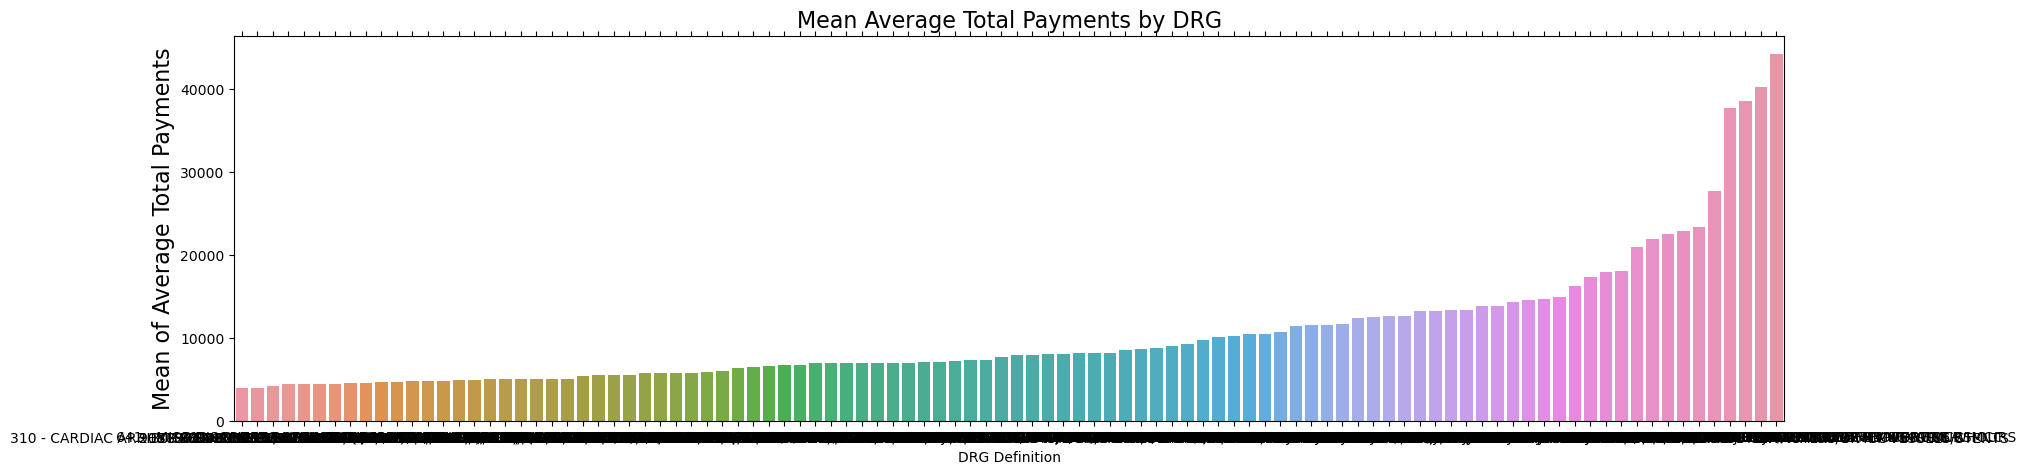

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-mean', data=groupby_drg.sort_values('Average Total Payments-mean'))
plt_setup(plt)
plt.title('Mean Average Total Payments by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments', fontsize=16)

Text(0, 0.5, 'Mean of Average Total Payments Variance')

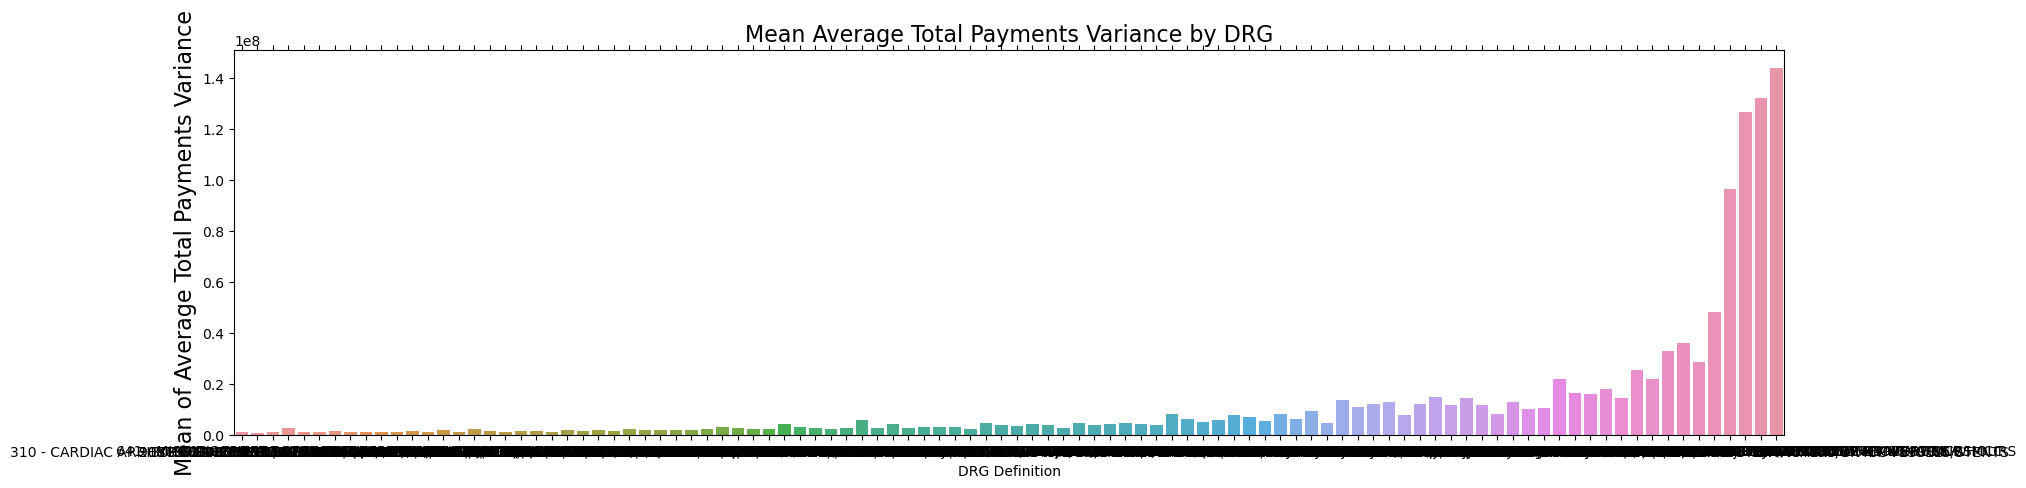

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-var', data=groupby_drg.sort_values('Average Total Payments-mean'))
plt_setup(plt)
plt.title('Mean Average Total Payments Variance by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments Variance', fontsize=16)

Text(0, 0.5, 'Mean of Average Total Payments Range')

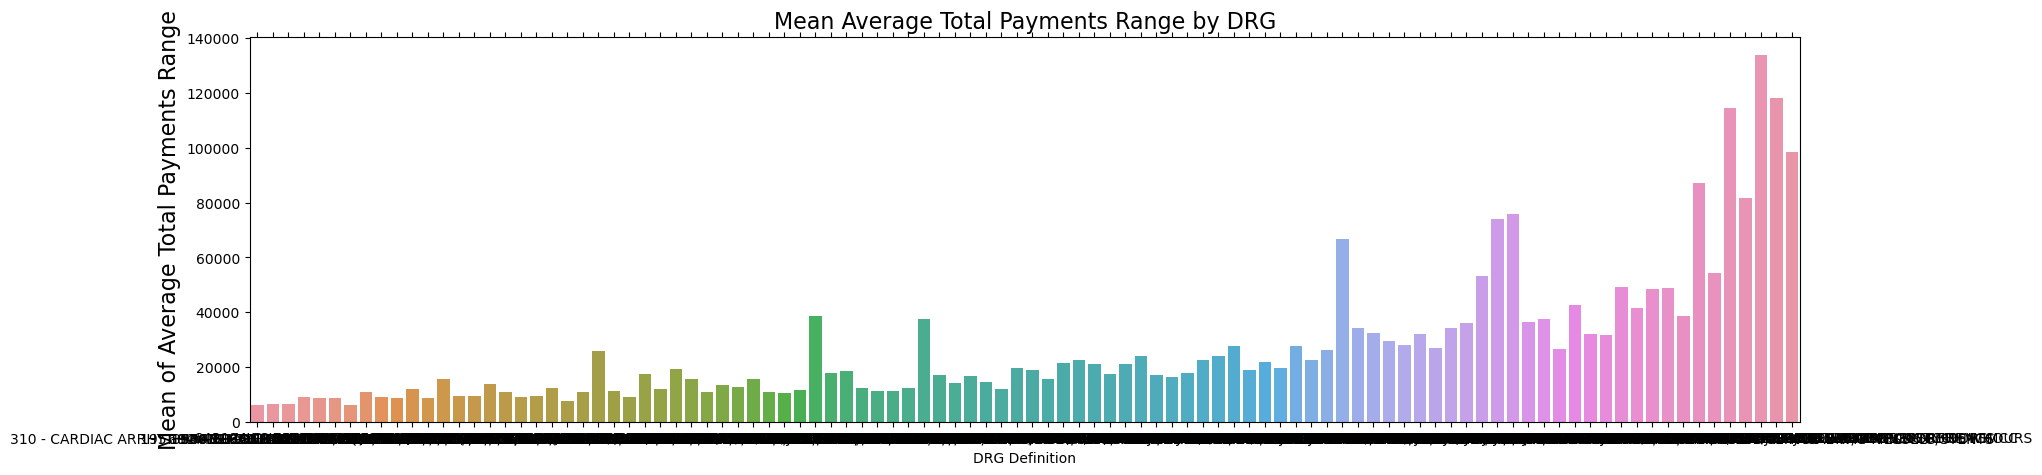

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='DRG Definition', y='Average Total Payments-range', data=groupby_drg.sort_values('Average Total Payments-var'))
plt_setup(plt)
plt.title('Mean Average Total Payments Range by DRG', fontsize=16)
plt.ylabel('Mean of Average Total Payments Range', fontsize=16)

In [20]:
import csv, sqlite3
os.listdir('.')

['inpatientCharges.csv', 'Untitled.ipynb', '.ipynb_checkpoints']

In [21]:
def unlock_db(db_filename):
    """Replace db_filename with the name of the SQLite database."""
    connection = sqlite3.connect(db_filename)
    connection.commit()
    connection.close()
    
unlock_db('hospital_charges.db')

In [23]:
conn = sqlite3.connect('hospital_charges.db')
_df = pd.read_csv('inpatientCharges.csv')
_df.columns = [column.strip() for column in _df.columns]
for column in ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']:
    _df[column] = _df[column].map(lambda x: x[1:])
    _df[column] = pd.to_numeric(_df[column])
_df.to_sql('hospital_charges', conn, if_exists='replace', index=False)
conn.close()

In [24]:
conn = sqlite3.connect('hospital_charges.db')

query = '''
SELECT `DRG Definition`, `Provider State` as providerState, t.maxAvgPaymentPerDRG
FROM hospital_charges hc
INNER JOIN (
    SELECT `DRG Definition` as drg, MAX(`Average Total Payments`) as maxAvgPaymentPerDRG
    FROM hospital_charges
    GROUP BY `DRG Definition`
) t
ON hc.`DRG Definition` == t.drg AND hc.`Average Total Payments` == t.maxAvgPaymentPerDRG
ORDER BY providerState ASC
'''

cursor = conn.execute(query)
results = [record for record in cursor]
conn.close()

In [25]:
_df = pd.DataFrame(results, columns=['DRG', 'ProviderState', 'Payment'])

In [26]:
conn = sqlite3.connect('hospital_charges.db')

ranking_by_drg = dict()
for drg in df['DRG Definition'].unique():

    query = """
        SELECT `Provider State` as providerState
        FROM hospital_charges
        WHERE `DRG Definition` = '{drg}' 
        GROUP BY `Provider State`
        ORDER BY AVG(`Average Total Payments`) ASC
    """.format(drg=drg)
    
    cursor = conn.execute(query)
    ranking_by_drg[drg] = [record[0] for record in cursor]
    
conn.close()

In [27]:
for k,v in ranking_by_drg.items():
    while True:
        if len(v) >= 51:
            break
        v.append(None)

In [28]:
drg_by_id = {key.split(' - ')[0]: key for key in ranking_by_drg.keys()}
df_rank = pd.DataFrame(ranking_by_drg)

In [29]:
from collections import defaultdict

_df = pd.DataFrame(index=df['Provider State'].unique())
for column in df_rank.columns:
    rankings_by_state = []

    if column in ['rank']:
        continue
        
    for rank, curr_state in zip(df.index, df_rank[column]):
        rankings_by_state.append(curr_state)
    
    t = pd.DataFrame(rankings_by_state, columns=['State'])
    t['Rank'] = t.index
    t.set_index(['State'], inplace=True)
    
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
    
_df.columns = drg_by_id.keys()

In [30]:
_df.fillna(-100, inplace=True)
_df.head()

,039,057,069,064,065,066,074,101,149,176,...,812,853,885,870,871,872,897,948,917,918
AK,45,46,49.0,50,50,50,-100.0,49,-100.0,49,...,50,49,48.0,47.0,50,50,48,50,-100.0,49
AL,0,0,0.0,1,1,0,2.0,0,2.0,0,...,0,1,1.0,1.0,1,1,0,0,2.0,1
AR,3,4,1.0,3,2,2,5.0,3,1.0,1,...,3,0,2.0,0.0,0,2,1,1,6.0,0
AZ,36,29,36.0,33,33,34,22.0,34,27.0,35,...,36,25,34.0,25.0,38,37,8,28,23.0,27
CA,44,44,44.0,47,45,46,44.0,44,40.0,45,...,46,46,44.0,45.0,45,45,46,44,44.0,44


Text(0.5, 565.4722222222223, 'DRG Definition Id')

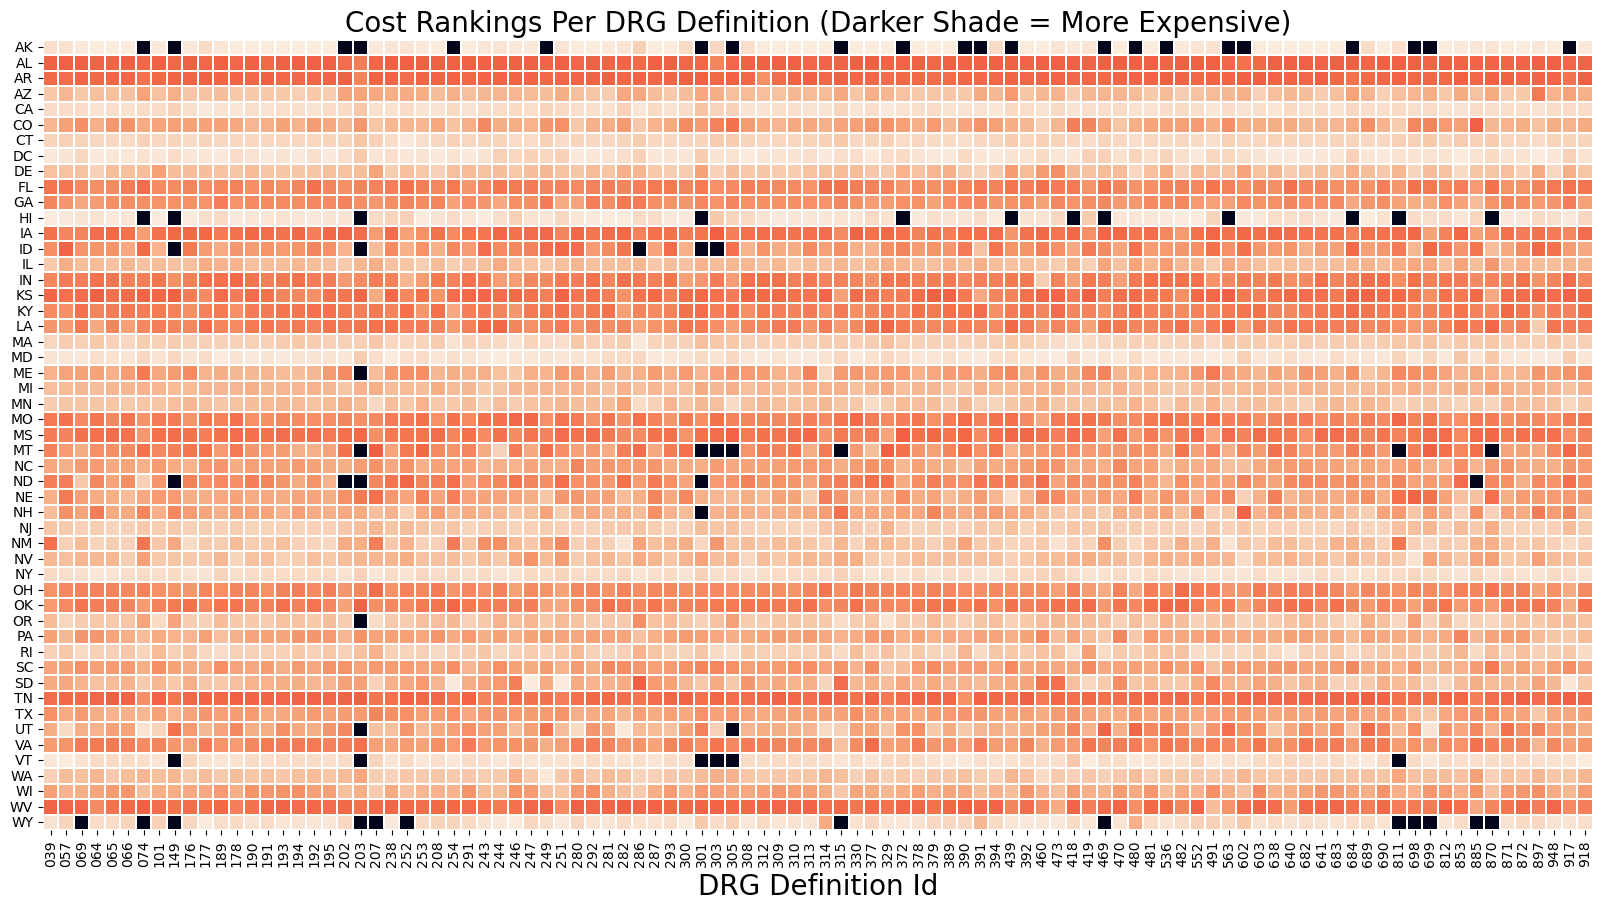

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(_df, square=True, vmin=-100, cbar=False, linewidths=0.1)
plt.title("Cost Rankings Per DRG Definition (Darker Shade = More Expensive)", fontsize=20)
plt.xlabel("DRG Definition Id", fontsize=20)

In [32]:
conn = sqlite3.connect('hospital_charges.db')

total_discharges_by_drg = dict()
for drg in df['DRG Definition'].unique():

    query = """
        SELECT `Provider State` as providerState, SUM(`Total Discharges`) as numDischarges
        FROM hospital_charges
        WHERE `DRG Definition` = '{drg}' 
        GROUP BY `Provider State`
    """.format(drg=drg)
    
    cursor = conn.execute(query)
    total_discharges_by_drg[drg] = [(record[0], record[1]) for record in cursor]
    
conn.close()

In [33]:
_df = pd.DataFrame(index=df['Provider State'].unique())
for k,v in total_discharges_by_drg.items():
    t = pd.DataFrame(v, columns=['State', 'Total_Discharges'])
    t.set_index(['State'], inplace=True)
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
_df.columns = drg_by_id.keys()
_df.fillna(0, inplace=True)

In [34]:
normalized_df = _df.divide(_df.sum(axis=1), axis=0)
normalized_df.head()

,039,057,069,064,065,066,074,101,149,176,...,812,853,885,870,871,872,897,948,917,918
AL,0.006160,0.004029,0.009761,0.008907,0.016846,0.008276,0.003287,0.006727,0.001338,0.004772,...,0.017189,0.003721,0.010946,0.001864,0.033447,0.012887,0.006097,0.007533,0.002551,0.005144
AK,0.003745,0.001791,0.005047,0.007327,0.024748,0.013676,0.000000,0.006350,0.000000,0.004233,...,0.011885,0.003582,0.022468,0.001791,0.041517,0.019538,0.004070,0.005698,0.000000,0.004884
AZ,0.005793,0.003690,0.012848,0.008527,0.015114,0.008384,0.002925,0.006969,0.004378,0.007132,...,0.009761,0.006501,0.002667,0.001931,0.040476,0.015019,0.000956,0.006462,0.003126,0.004101
AR,0.007514,0.002847,0.008309,0.007595,0.016861,0.008747,0.001936,0.004725,0.000173,0.004345,...,0.014141,0.003469,0.018832,0.001832,0.038712,0.016527,0.002582,0.005993,0.001637,0.005209
CA,0.003611,0.003093,0.009350,0.011074,0.016506,0.007838,0.002836,0.005941,0.002265,0.002943,...,0.012070,0.008649,0.023146,0.006436,0.072180,0.023500,0.004329,0.005310,0.002933,0.003537


Text(0.5, 565.4722222222223, 'DRG Definition Id')

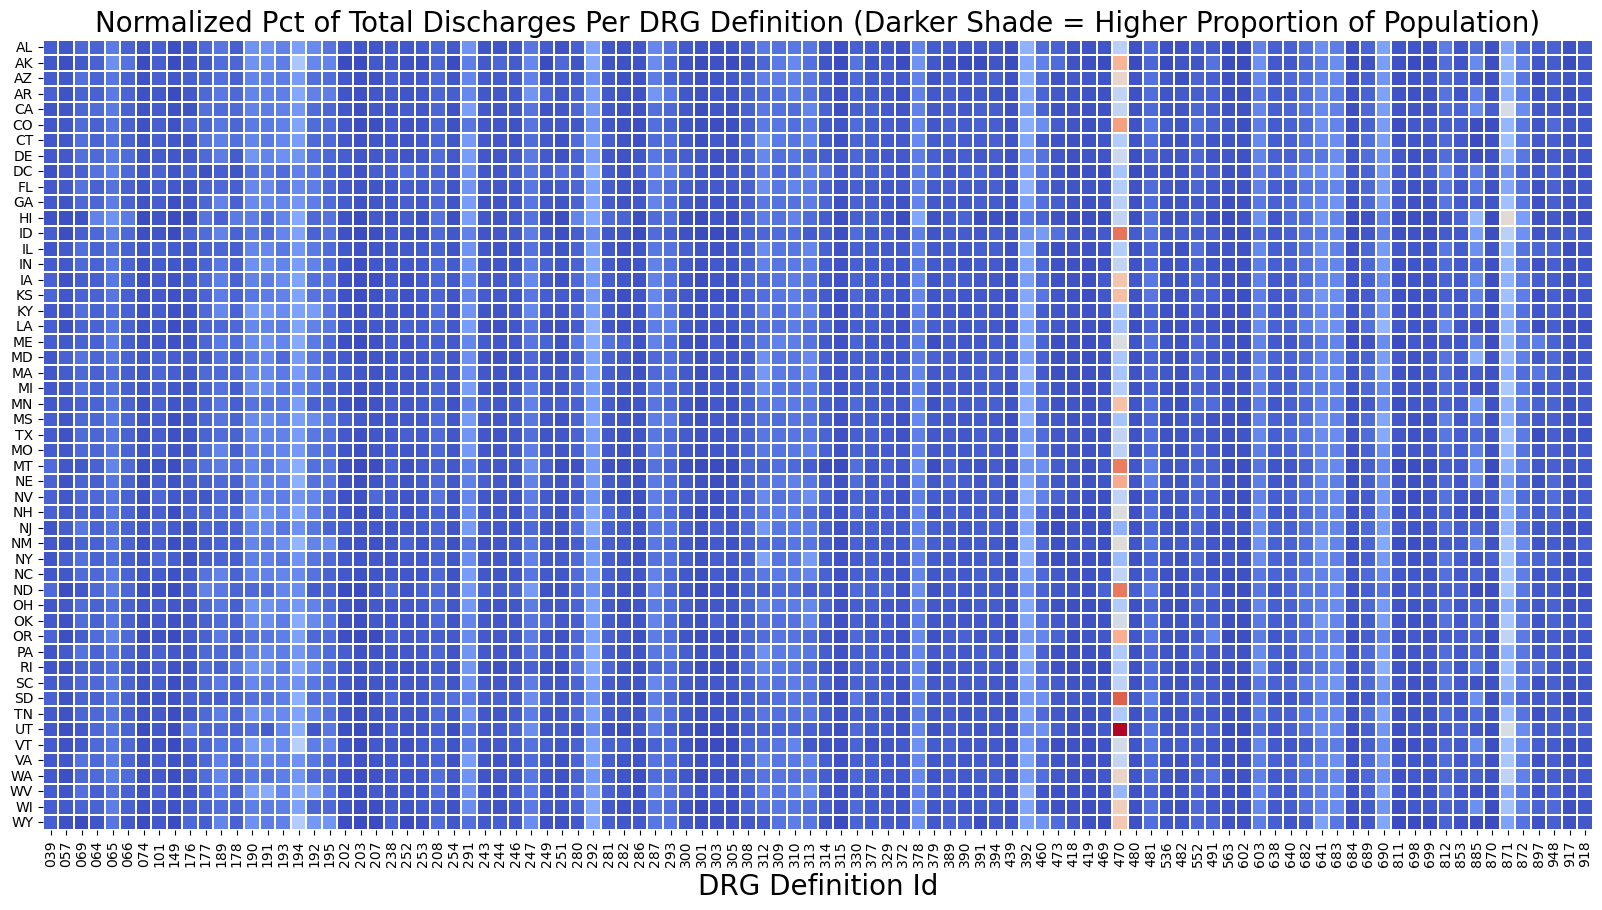

In [36]:
normalized_df = _df.divide(_df.sum(axis=1), axis=0)

plt.figure(figsize=(20,20))
sns.heatmap(normalized_df, square=True, vmin=0, cbar=False, linewidths=0.1, cmap="coolwarm")
plt.title("Normalized Pct of Total Discharges Per DRG Definition (Darker Shade = Higher Proportion of Population)", fontsize=20)
plt.xlabel("DRG Definition Id", fontsize=20)

In [37]:
drg_by_id['563'], drg_by_id['203'], drg_by_id['177']

('563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP, PELVIS & THIGH W/O MCC',
 '203 - BRONCHITIS & ASTHMA W/O CC/MCC',
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC')

In [38]:
SELECTED_DRG =  drg_by_id['203']
SELECTED_PROVIDER_ID = None
SELECTED_DRG

'203 - BRONCHITIS & ASTHMA W/O CC/MCC'

In [39]:
_df = df[df['DRG Definition'] == SELECTED_DRG]
_df.loc[:, 'Provider State'] = _df.loc[:, 'Provider State'].astype('category')
groupby_state = _df.groupby(by='Provider State').agg(['mean', 'min', 'max'])
groupby_state.reset_index(inplace=True)

In [40]:
groupby_state.head(3)

Provider State   Provider Id               Provider Zip Code                \
                          mean    min    max              mean    min    max   
0             AL  10065.500000  10006  10164      35982.735294  35058  36854   
1             AR  40056.750000  40007  40119      72244.833333  71603  72764   
2             AZ  30057.142857  30002  30119      85538.357143  85006  86409   

  Total Discharges         Average Covered Charges                     \
              mean min max                    mean      min       max   
0        17.205882  11  38            12310.583235  3113.76  42618.56   
1        15.250000  11  22            11199.528333  6122.88  16480.90   
2        15.000000  11  23            16741.854286  7385.11  30118.72   

  Average Total Payments                   Average Medicare Payments           \
                    mean      min      max                      mean      min   
0            3818.779706  2951.11  6254.63               2370.805882  1148.90   
1            3845.863333  3237.47  4685.30               2606.123333  2153.85   
2            4194.589286  3602.54  5179.29               3041.233571  2283.90   

            
       max  
0  3823.71  
1  3433.22  
2  4248.94

Text(0.5, 0, 'Provider State')

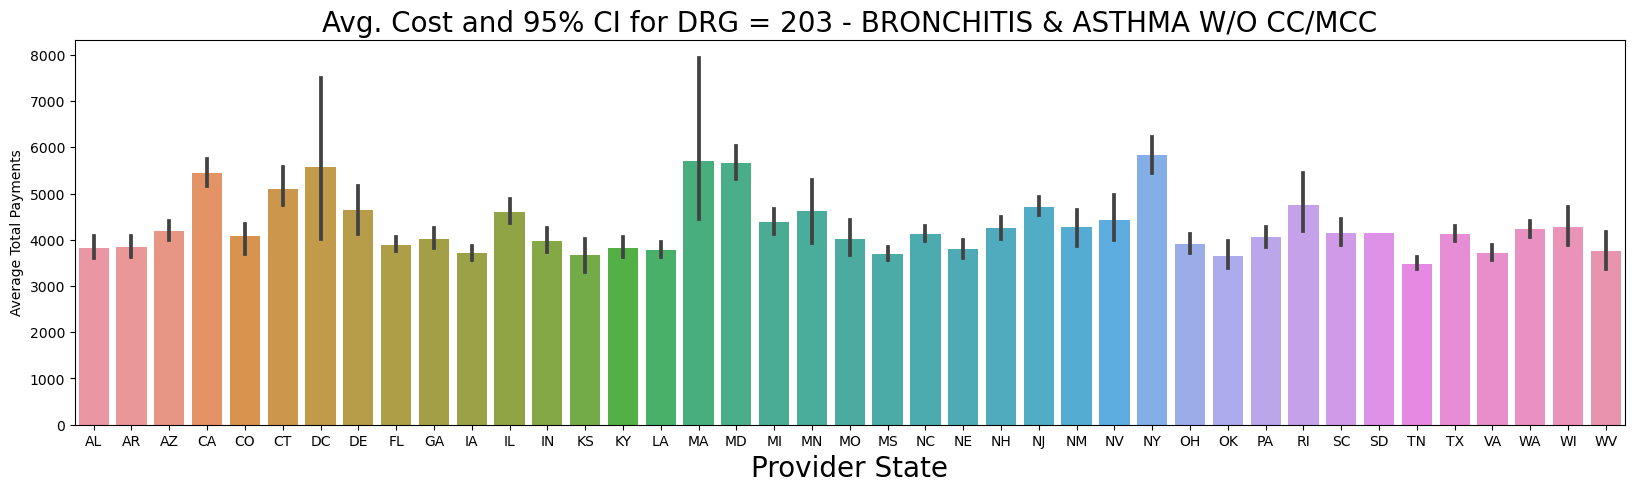

In [41]:
plt.figure(figsize=(20,5))
sns.barplot(x='Provider State', y='Average Total Payments', data=_df)
plt.title('Avg. Cost and 95% CI for DRG = {}'.format(SELECTED_DRG), fontsize=20)
plt.xlabel('Average Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)

Text(0.5, 0, 'Provider State')

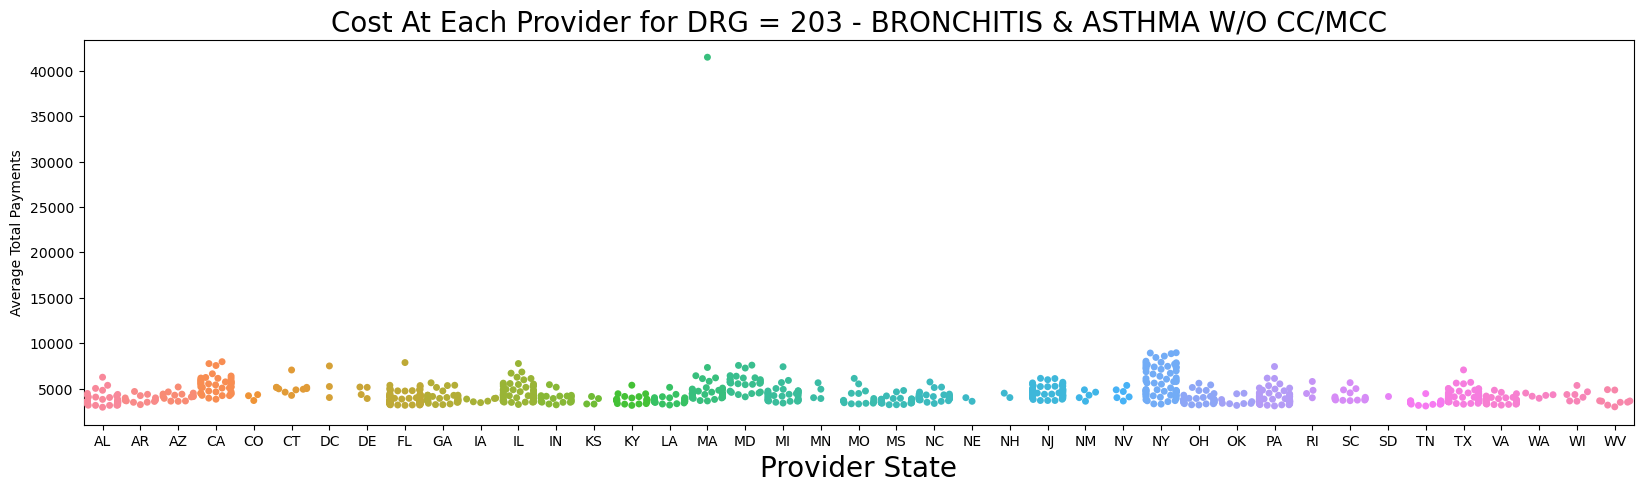

In [42]:
plt.figure(figsize=(20,5))
sns.swarmplot(x="Provider State", y='Average Total Payments', data=_df)
plt.title('Cost At Each Provider for DRG = {}'.format(SELECTED_DRG), fontsize=20)
plt.xlabel('Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)